In [1]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temperature = 10
numberOfAtoms = 1000
simulationSteps = 500000

quantumNumberArray = np.ones([numberOfAtoms,1], int)

energyAtEachStep = np.zeros([simulationSteps,1], float)

## Each atom starts in n=1 and
## Contributes 1/2 unit of energy (hbar, pi, m, L = 1)
E = numberOfAtoms/2

## Monte Carlo Loop
for step in range(simulationSteps):
    
    # Choose atom and the move
    ithAtom = random.randrange(numberOfAtoms)
    
    # Randomly select the next energy state +1 or -1
    if random.random() < 0.5:    
        
        changeInState = 1
        changeInEnergy = (0.5)*(2*quantumNumberArray[ithAtom]+1)
    else:
        
        changeInState = -1
        changeInEnergy = (0.5)*(-2*quantumNumberArray[ithAtom]+1)
        
    # Decide to accept with thermodynamic probability
    if quantumNumberArray[ithAtom] > 1 or changeInState == 1:
        
        thermodynamicProbability = np.exp(-changeInEnergy/temperature)
        
        if random.random() < thermodynamicProbability:
            
            quantumNumberArray[ithAtom] += changeInState
            E += changeInEnergy
    
    energyAtEachStep[step] = E

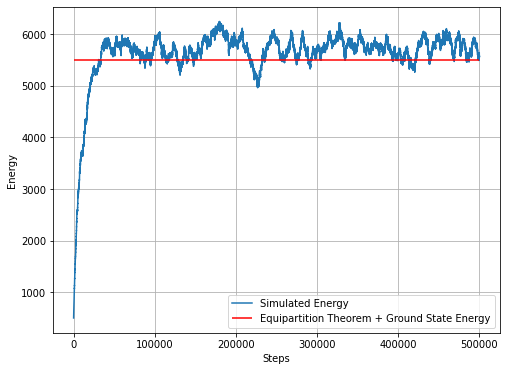

In [3]:
plt.figure(figsize=(8,6))
plt.plot(energyAtEachStep, label = 'Simulated Energy')
plt.hlines(numberOfAtoms*temperature/2+numberOfAtoms/2, 0, simulationSteps, 'r', label='Equipartition Theorem + Ground State Energy')

plt.ylabel('Energy')
plt.xlabel('Steps')

plt.grid()
plt.legend()

In [4]:
## your code here